In [ ]:
# python 数据分析实践练习-统计学 from Gaël Varoquaux
# 来源：https://scipy-lectures.org/packages/statistics/index.html
# 更多参考书籍：http://greenteapress.com/thinkstats2/html/index.html

In [ ]:
# Manipulating data

In [7]:
import pandas as pd
data = pd.read_csv('brain_size.csv', sep=';',na_values='.',index_col=0)
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [9]:
data.shape

(40, 7)

In [10]:
data.columns

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

In [12]:
print(data['Gender'])

1     Female
2       Male
3       Male
4       Male
5     Female
6     Female
7     Female
8     Female
9       Male
10      Male
11    Female
12      Male
13      Male
14    Female
15    Female
16    Female
17    Female
18      Male
19    Female
20      Male
21      Male
22      Male
23    Female
24      Male
25    Female
26      Male
27    Female
28      Male
29    Female
30    Female
31    Female
32      Male
33      Male
34      Male
35    Female
36    Female
37      Male
38    Female
39      Male
40      Male
Name: Gender, dtype: object


In [14]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [15]:
data.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [20]:
data[data['Gender'] == 'Female'].count()

Gender       20
FSIQ         20
VIQ          20
PIQ          20
Weight       20
Height       20
MRI_Count    20
dtype: int64

In [16]:
groupby_gender = data.groupby('Gender')
groupby_gender.describe()

FSIQ                                                        VIQ  \
       count   mean        std   min    25%    50%     75%    max count   
Gender                                                                    
Female  20.0  111.9  23.686327  77.0  90.25  115.5  133.00  140.0  20.0   
Male    20.0  115.0  24.986312  80.0  89.75  118.0  139.25  144.0  20.0   

                ...  Height       MRI_Count                                   \
          mean  ...     75%   max     count      mean          std       min   
Gender          ...                                                            
Female  109.45  ...  66.875  70.5      20.0  862654.6  55893.55578  790619.0   
Male    115.25  ...  73.750  77.0      20.0  954855.4  55911.35471  879987.0   

                                                  
              25%       50%       75%        max  
Gender                                            
Female  828062.00  855365.0  882668.5   991305.0  
Male    919529.25  947241.5  973496.0  1079549.0  

[2 rows x 48 columns]

In [18]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [19]:
groupby_gender.mean()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [ ]:
# Plotting data

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

In [ ]:
# Hypothesis testing: comparing two groups

In [2]:
import pandas as pd
data = pd.read_csv('brain_size.csv', sep=';',na_values='.',index_col=0)

In [3]:
# simple t-test: testing the value of a population mean
from scipy import stats
stats.ttest_1samp(data['VIQ'], 0)
#  With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [4]:
# simple t-test: testing for difference across populations
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [6]:
# Paired tests: repeated measurements on the same individuals
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [7]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [8]:
# T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

In [9]:
# Linear models, multiple factors, and analysis of variance

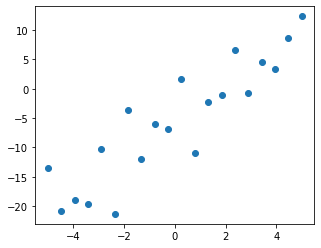

In [27]:
# A simple linear regression
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Generate and show the data
x = np.linspace(-5, 5, 20)

# To get reproducable values, provide a seed value
np.random.seed(1)

y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Plot the data
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')

In [28]:
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

# Peform analysis of variance on fitted linear model
from statsmodels.formula.api import ols

model = ols("y ~ x", data).fit()  # 最小二乘法
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           8.56e-08
Time:                        14:43:12   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [29]:
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(model)
print(anova_results)

            df       sum_sq      mean_sq          F        PR(>F)
x          1.0  1588.873443  1588.873443  74.029383  8.560649e-08
Residual  18.0   386.329330    21.462741        NaN           NaN


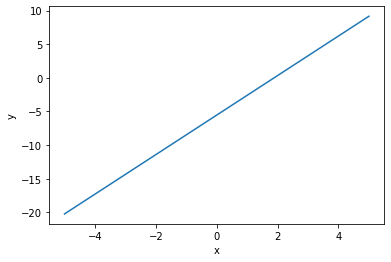

In [30]:
# Plot the fitted model

# Retrieve the parameter estimates
offset, coef = model._results.params
plt.plot(x, x*coef + offset)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [18]:
# Categorical variables: comparing groups or multiple categories
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 12 Feb 2020   Prob (F-statistic):              0.445
Time:                        13:56:31   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [21]:
# Link to t-tests between different FSIQ and PIQ
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
#print(data_long)
model = ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Wed, 12 Feb 2020   Prob (F-statistic):              0.643
Time:                        14:04:19   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [22]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [ ]:
# Multiple Regression: including multiple factors

In [23]:
# the iris data
data = pd.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           1.58e-20
Time:                        14:07:23   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [24]:
# Post-hoc hypothesis testing: analysis of variance (ANOVA)
print(model.f_test([0, 1, -1, 0]))

<F test: F=array([[3.24533535]]), p=0.07369058781701113, df_denom=146, df_num=1>


In [ ]:
# More visualization: seaborn for statistical exploration

In [31]:
# Standard library imports
import urllib.request
import os

import matplotlib.pyplot as plt

In [33]:
# Load the data
import pandas as pd

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

In [34]:
# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

/Users/zhengxixuan/.pyenv/versions/3.7.0/envs/data101/lib/python3.7/site-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


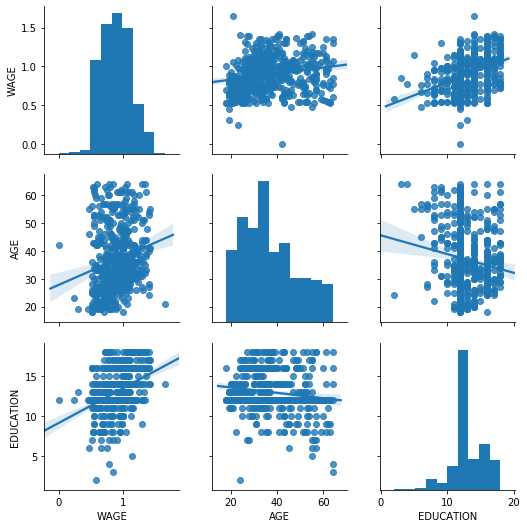

In [35]:
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

# Plot scatter matrices highlighting different aspects

import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

Text(0.5, 0.98, 'Effect of gender: 1=Female, 0=Male')

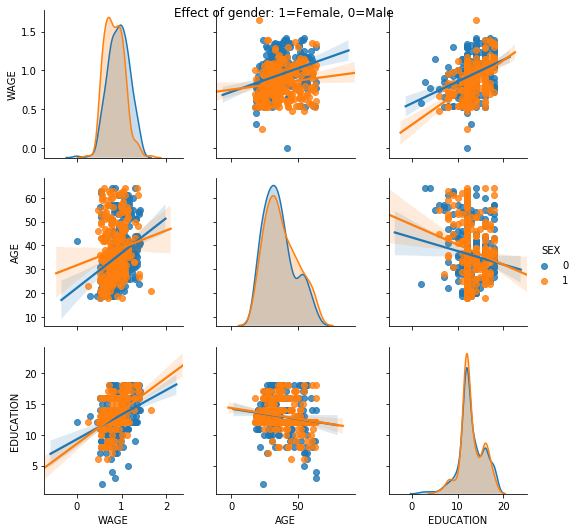

In [37]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX') 
plt.suptitle('Effect of gender: 1=Female, 0=Male')

Text(0.5, 0.98, 'Effect of race: 1=Other, 2=Hispanic, 3=White')

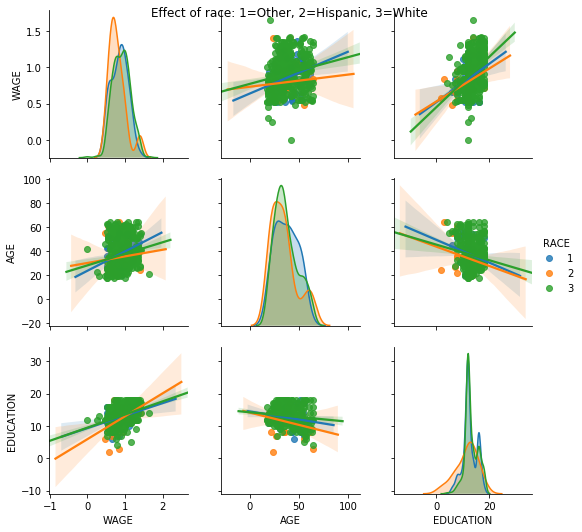

In [38]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

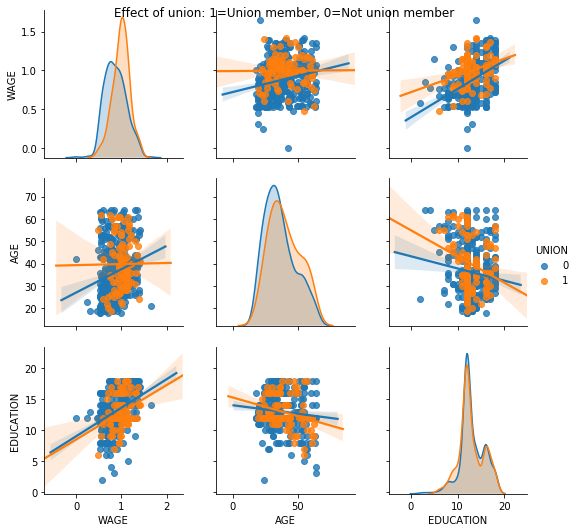

In [39]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

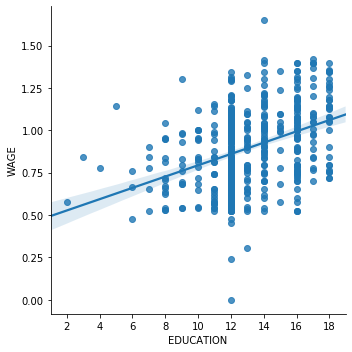

In [41]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

/Users/zhengxixuan/.pyenv/versions/3.7.0/envs/data101/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


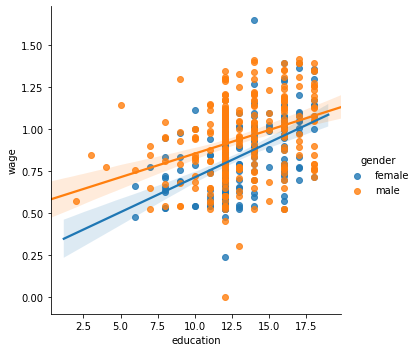

In [42]:
data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, names=['education', 'gender', 'wage'],
                       usecols=[0, 2, 5],
                       )

data['gender'] = np.choose(data.gender, ['male', 'female'])
data['wage'] = np.log10(data['wage'])
seaborn.lmplot(y='wage', x='education', hue='gender', data=data)

In [43]:
# statistical analysis
import statsmodels.formula.api as sm

result = sm.ols(formula='wage ~ education + gender', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     63.42
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           2.01e-25
Time:                        15:17:06   Log-Likelihood:                 86.654
No. Observations:                 534   AIC:                            -167.3
Df Residuals:                     531   BIC:                            -154.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4053      0.046      8.

In [44]:
result = sm.ols(formula='wage ~ education + gender + education * gender',
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           2.94e-25
Time:                        15:17:34   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               